In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

In [2]:
im = Image.open("image/01_sample")
area = (0, 0, 200, 200)
im = im.crop(area)

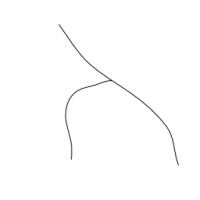

In [3]:
im

In [4]:
im.size

(200, 200)

In [5]:
desired_size = 600

In [6]:
delta_w = desired_size - im.size[0]
delta_h = desired_size - im.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_im = ImageOps.expand(im, padding, fill=(255, 255, 255))

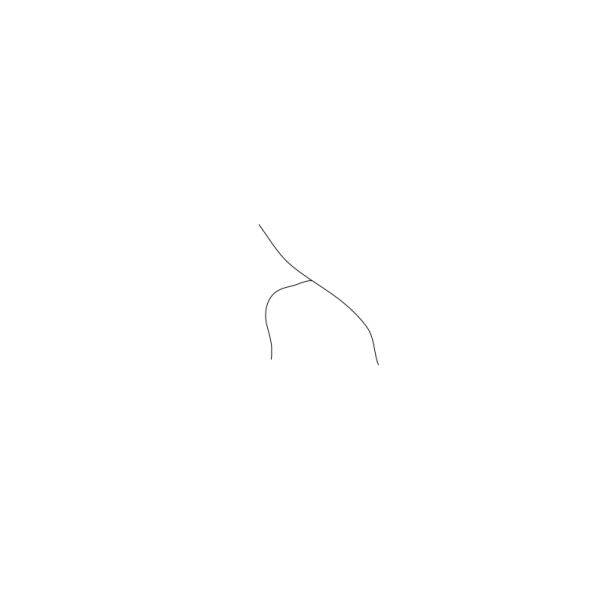

In [7]:
new_im

In [8]:
im_array = np.asarray(new_im.convert('L'))

In [9]:
im_array.shape

(600, 600)

## Fast Marching with Djikstra

In [10]:
n = 600

In [11]:
W = im_array

In [12]:
x_start = np.where(np.sum(im_array<200, axis=0) != 0)[0][0]
y_start = np.where(np.sum(im_array<200, axis=1) != 0)[0][0]
start_point = (x_start, y_start)

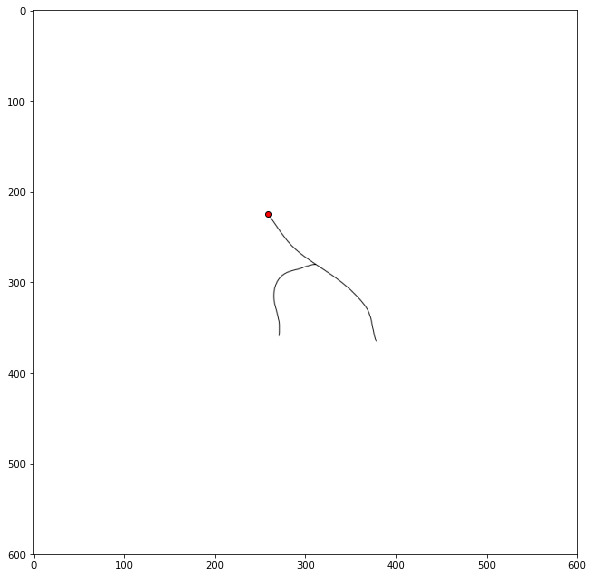

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(start_point[0], start_point[1], color='r', edgecolor='k')
plt.imshow(im_array, cmap='gray')
plt.show()

In [14]:
from __future__ import division

In [15]:
neigh = np.array([[1, -1, 0, 0], [0, 0,  1, -1]])

In [16]:
boundary = lambda x: np.mod(x,n)

In [17]:
ind2sub1 = lambda k: [int( (k-np.fmod(k,n))/n ), np.fmod(k,n)]
sub2ind1 = lambda u: int( u[0]*n + u[1] )
Neigh = lambda k,i: sub2ind1(boundary(ind2sub1(k) + neigh[:,i]))

In [18]:
from math import inf

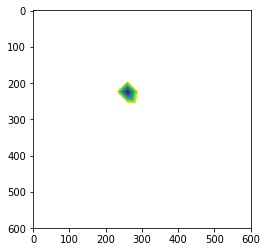

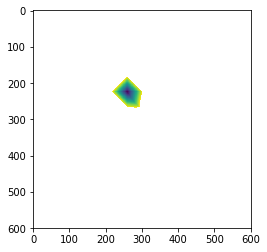

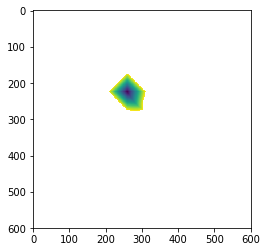

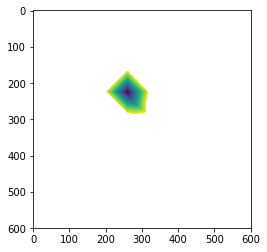

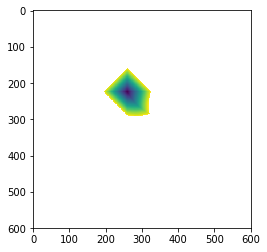

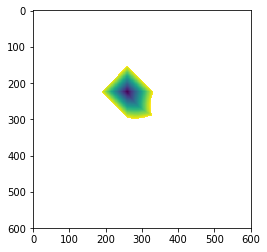

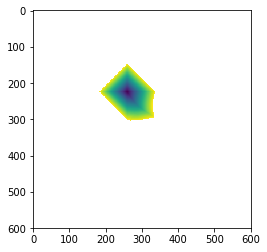

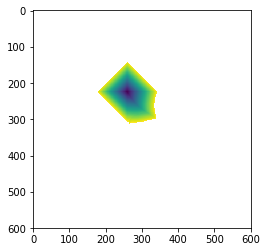

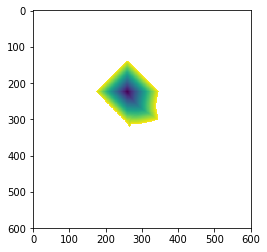

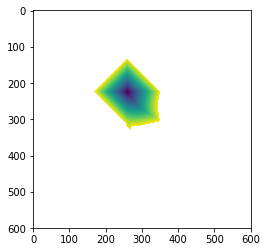

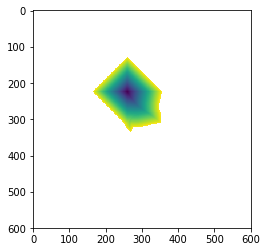

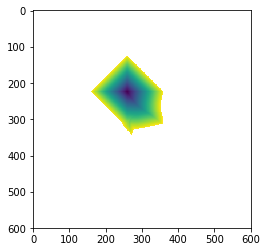

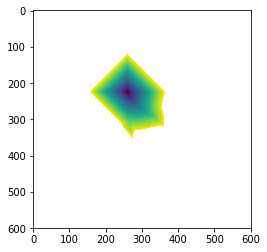

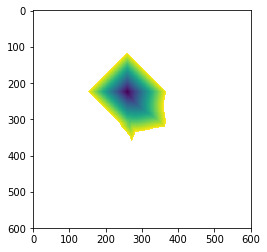

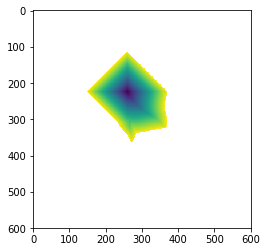

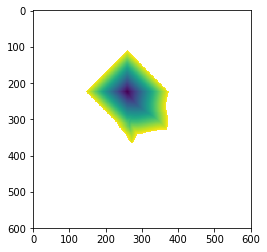

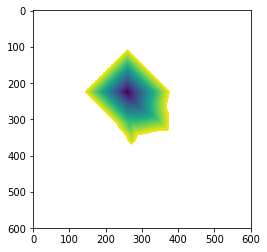

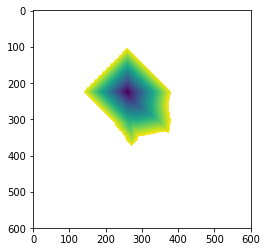

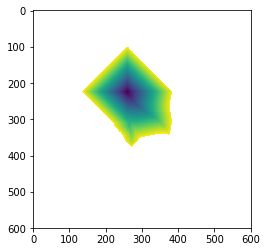

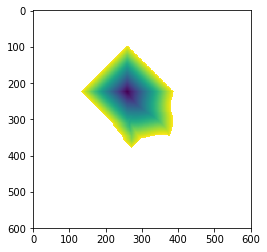

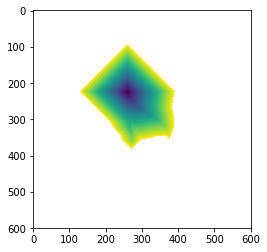

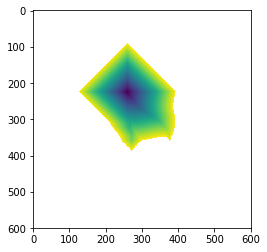

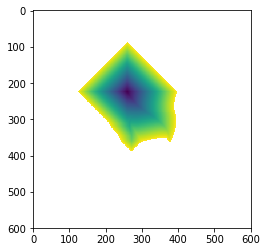

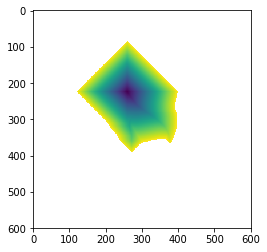

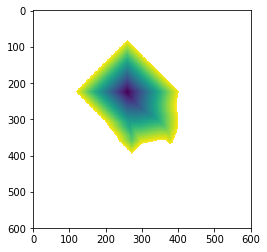

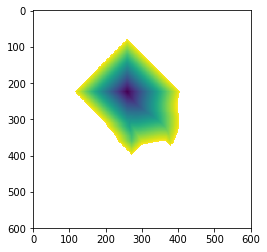

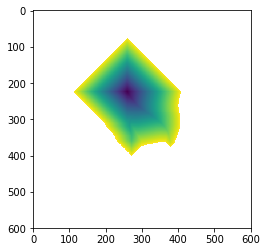

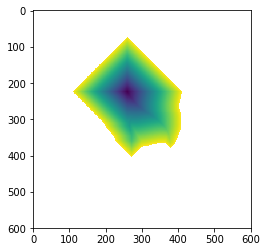

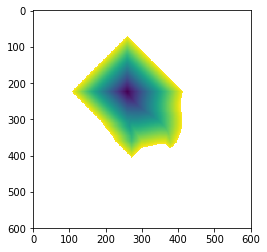

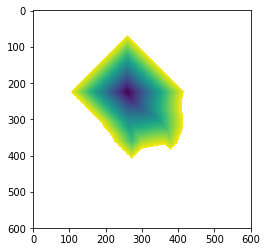

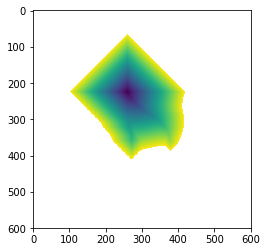

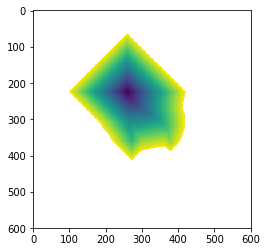

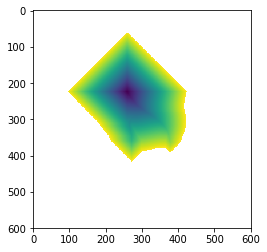

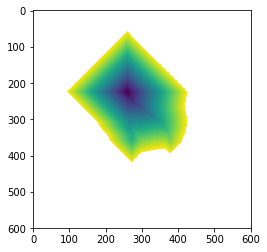

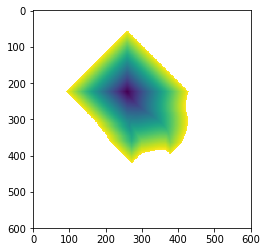

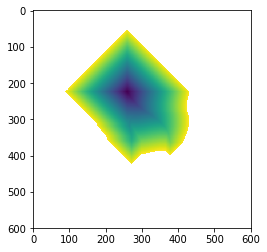

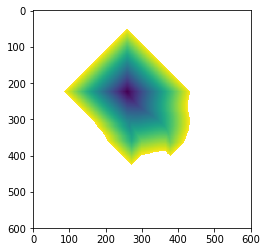

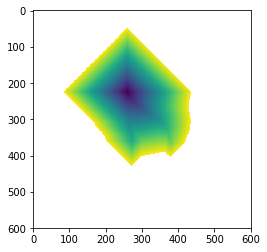

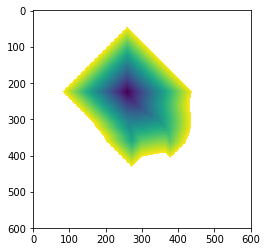

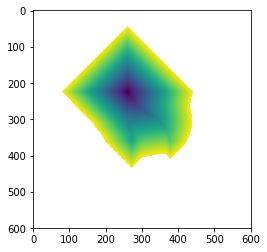

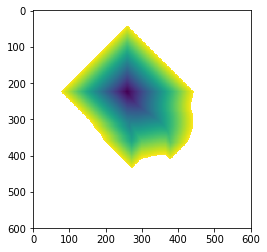

KeyboardInterrupt: 

In [19]:
x0 = [y_start, x_start]
I = [sub2ind1(x0)]

D = np.ones((n,n)) + inf
u = ind2sub1(I)
D[u[0],u[1]] = 0

S = np.zeros((n,n))
S[u[0],u[1]] = 1

extract   = lambda x,I: x[I]
extract1d = lambda x,I: extract(x.flatten(),I)

count = 0

while I:
    
    count += 1
    
    j = np.argsort( extract1d(D,I)  )
    if np.ndim(j)==0:
        j = [j]   # make sure that j is a list a not a singleton
    j = j[0]
    i = I[j]         
    a = I.pop(j)
    
    u = ind2sub1(i);
    S[u[0],u[1]] = -1
    
    J = [] 
    for k in np.arange(0,4):
        j = Neigh(i,k)
        if extract1d(S,j)!=-1:
            # add to the list of point to update
            J.append(j)           
            if extract1d(S,j)==0:
                # add to the front
                u = ind2sub1(j)
                S[u[0],u[1]] = 1
                I.append(j)
                
    DNeigh = lambda D,k: extract1d(D,Neigh(j,k))
    for j in J:
        dx = min(DNeigh(D,0), DNeigh(D,1))
        dy = min(DNeigh(D,2), DNeigh(D,3))
        u = ind2sub1(j)
        w = extract1d(W,j);
        D[u[0],u[1]] = min(dx + w, dy + w)
    
    if count % 2000 == 0:
        plt.imshow(D)
        plt.show()
    
    if np.sum(D[200:400, 200:400]) < inf:
        break

print('Done.')

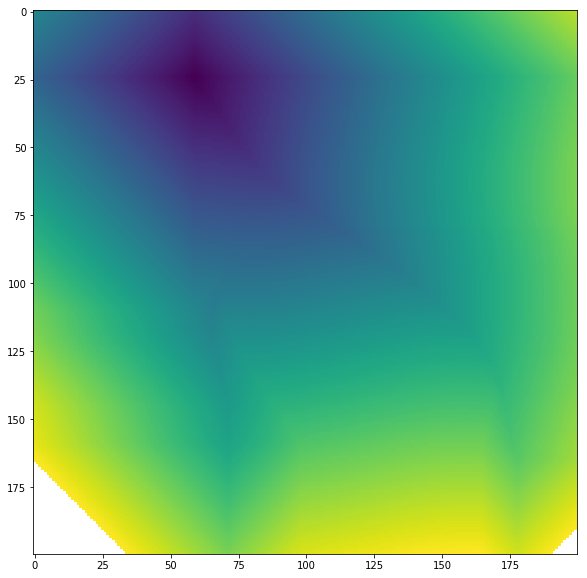

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(D[200:400, 200:400])
plt.show()